<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(11_15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**応用数理科学(第7回)**
前回の講義では、最尤法を学び、対数尤度がモデルの良さを表すことを見てきた。
モデル選択には、将来に得られるデータも含めた平均対数尤度を用いるのが良さそうであるが、最尤モデルで得られる最大対数尤度とはズレがあること、そのズレは、モデルの自由パラメータの数となりそう、ということを数値実験で確認した。
今回は、最尤モデルの平均対数尤度と最大対数尤度との関係式を理論的に導出することで、モデル選択の評価指標の１つ、AICを理解しよう。

##**AIC (Akaike Information Criterion)**#
最大対数尤度$\log L$、自由パラメータの数$k$とし
$$AIC = -2\log L + 2k$$
を定義する。
先の数値実験で得られた関係式を$-2$倍した式となる。
したがって、AICが最小となるモデルを選択すれば、多くの場合、良いモデル選択となる。
AICを**赤池情報量基準(Akaike Information Criterion）**という。

特に、例(正規分布)で示したように、誤差が正規分布のときには、分散の最尤推定量$\hat \sigma^2$を用いて
$$AIC = n\log{2\pi\hat\sigma^2}+n+2k\tag{3}$$
となる。

注意点として、数値実験で行ったような1次元の多項式回帰モデルを作るときには、$m$次の多項式なら、$(m+1)$個の係数がある。加えて、分散も最尤推定量になるので$+1$個となり、自由パラメータの数$k=m+2$となる。（数値実験では分散に真値を与えていたので$k=m+1$）

では、以下に、AICの導出を理論的に見てみよう。



##**準備1**##
**フィッシャー情報量**（フィッシャー情報行列）

確率変数$X$は確率密度関数$f(x,\theta^*)$に従うとする。
このとき、フィッシャー情報量$I$を
$$I=E[(\frac{\partial}{\partial \theta}\log f(X,\theta^*))^2]$$
と定義する。$\log f$が2階微分可能なら
$$I=-E[\frac{\partial^2}{\partial \theta^2}\log f(X,\theta^*)]$$
と表すことができる。

母数$\theta=(\theta_1,\cdots,\theta_n)$の$N$次ベクトルなら、$I$は$N \times N$行列となり、フィッシャー情報行列という。その要素は
$$I_{ij}=E[\frac{\partial}{\partial \theta_i}\log f(X,\theta^*)\frac{\partial}{\partial \theta_j}\log f(X,\theta^*)]$$であり、同様に
$$I_{ij}=-E[\frac{\partial^2}{\partial \theta_i\partial\theta_j}\log f(X,\theta^*)] $$
である。

**例（正規分布）**

$\theta=(\mu, \sigma^2)$とおく。フィッシャー情報行列は
$$
I=\left(
\begin{align}
& \frac{n}{\sigma^2} & 0 \\
& 0 & \frac{n}{2\sigma^4}
\end{align}
\right )
$$
となる

####**解説**####
$\int f(x,\theta) dx = 1$の両辺を$\theta$について微分する。
$$
  \begin{align}
   0 &=& \int \frac{\partial}{\partial \theta}f(x,\theta)dx\\
     &=& \int f(x,\theta)\frac{\partial}{\partial \theta}\log f(x,\theta)dx\\
     &=& E[\frac{\partial}{\partial \theta}\log f(X,\theta)]
  \end{align}
$$
次に、もう1度微分して
$$
  \begin{align}
   0 &=& \frac{\partial}{\partial \theta}\int f(x,\theta)\frac{\partial}{\partial \theta}\log f(x,\theta)dx\\
   &=& \int \frac{\partial f(x,\theta)}{\partial \theta}\frac{\partial}{\partial \theta}\log f(x,\theta)dx + \int f(x,\theta)\frac{\partial^2}{\partial \theta^2}\log f(x,\theta)\\
   &=& \int f(x,\theta)(\frac{\partial}{\partial \theta}\log f(x,\theta))^2dx
+\int f(x,\theta)\frac{\partial^2}{\partial \theta^2}\log f(x,\theta)\\
&=& I + E[\frac{\partial^2}{\partial \theta^2}\log f(X,\theta)]
  \end{align}
$$
となり、$I=-E[\frac{\partial^2}{\partial \theta^2}\log f(X,\theta^*)]$

##**準備2**##
**中心極限定理**

確率変数$X$は平均$0$で分散$\sigma^2$の正規分布に従うものとする。独立な確率変数$X_1,\cdots, X_n$が、$X$と同じ分布に従うとき、
$$Z_n = \frac{1}{\sqrt{n}}\sum_{i=1}^nX_i$$
は平均$0$で分散$\sigma^2$の正規分布に従う確率変数$Z$に法則収束する
$$\lim_{n\rightarrow\infty}E[g(\frac{1}{\sqrt{n}}\sum_{i=1}^nX_i)]=E[g(Z)]$$
ここで、$g(x)$は任意の有界連続関数である。

**解説**

確率変数$X$は、確率密度関数$f(x)$に従うとする。次の実数$t$の関数を特性関数という。（フーリエ変換）
$$
\phi(t) = E[e^{itX}] = \int_{-\infty}^\infty e^{itX}f(x)dx
$$

中心極限定理は、任意の有界連続関数$g(x)$についての期待値が、正規分布による期待値に収束することである。つまり、特性関数が任意の$t$で収束すればよい。

$Z_n$の特性関数は
$$
\phi_n(t) = E[\exp(it \frac{1}{\sqrt{n}}\sum_{j=1}^nX_j)]\\ 
=E[\Pi_{j=1}^n \exp(\frac{itX_j}{\sqrt{n}})]\\ 
=\left(E[\exp(\frac{itX}{\sqrt{n}})] \right)^n
$$
ここで、3段目に移るときに、$X_j$は互いに独立で同じ分布に従うことを用いた。

次の関数$g(s)$を導入する。
$$
g(s)=\left\{
\begin{matrix}
\frac{e^{is}-1-is}{-s^2/2} &(s\neq0)\\ 
1 & (s=0)
\end{matrix}\right.
$$
$|s|>1$において$|g(s)|\leq 2(|s|+2)/|s|^2$で有界である。


$$
E[\exp(\frac{itX}{\sqrt{n}})]=1  - \frac{t^2}{2n}E[X^2g(\frac{tX}{\sqrt{n}})]
$$
ここで、
$$
E[\frac{itx}{\sqrt{n}}] = 0
$$
$t$固定のもと、各$X$について、$n\rightarrow\infty$で
$g(tX/\sqrt{n})\rightarrow 1$であるから、積分と極限を交換し
$$
E[X^2\lim_{n\rightarrow\infty}g(tX/\sqrt{n})] = E[X^2]=\sigma^2
$$
したがって
$$
\lim_{n\rightarrow\infty}\phi_n(t)=\lim_{n\rightarrow\infty}\left(1-\frac{t^2\sigma^2}{2n}\right)^n=\exp(-\frac{\sigma^2}{2}t^2)
$$
右辺は、正規分布の特性関数である。


##**準備3**##
尤度方程式から、$\theta=\hat \theta$のとき、
$$\left[\frac{\partial \log L}{\partial \theta}\right]_{\theta=\hat\theta}=0$$
である。この式を真の値$\theta^*$の周りでテイラー展開する。
$$\sum_{i=1}^n[\frac{\partial}{\partial \theta}\log f(X_i,\theta)]_{\theta=\theta*}+(\hat \theta - \theta^*)\sum_{i=1}^n[\frac{\partial^2}{\partial \theta^2}\log f(X_i,\theta)]_{\theta=\theta*}=0$$

$n$が大きくなると、$\hat \theta\rightarrow\theta^*$であるので、
$$\lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=1}^n[\frac{\partial^2}{\partial \theta^2}\log f(X_i,\theta)]_{\theta=\theta*}= -I$$
したがって、
$$\frac{1}{\sqrt{n}}\sum_{i=1}^n[\frac{\partial}{\partial \theta}\log f(X_i,\theta)]_{\theta=\theta*}=\sqrt{n}(\hat \theta - \theta^*)\sum_{i=1}^n-\frac{1}{n}[\frac{\partial^2}{\partial \theta^2}\log f(X_i,\theta)]_{\theta=\theta*}\rightarrow \sqrt{n}(\hat \theta - \theta^*)I$$

##**準備4**##
$\sqrt{n}(\hat \theta - \theta^*)$は、$n\rightarrow\infty$で正規分布$N(0,I^{-1})$に従う。
$$\sqrt{n}(\hat \theta - \theta^*) \sim N(0,I^{-1})$$


**解説**
$$Z_n=\frac{1}{\sqrt{n}}\sum_{i=1}^n\frac{\partial}{\partial \theta}\log f(X_i,\theta^*)$$
とおく。準備1より
$$E[\frac{\partial}{\partial \theta}\log f(X_i,\theta^*)]=0$$であるので、
$$V[\frac{\partial}{\partial \theta}\log f(X_i,\theta^*)]=E[(\frac{\partial}{\partial \theta}\log f(X,\theta^*))^2]=I$$
ここで、$V[\cdot]$は分散の計算を表す。

準備2より、$n\rightarrow\infty$のとき、$Z_n$は、平均$0$、分散$I$の正規分布に従う確率変数$Z$に収束する。
$$Z\sim N(0,I)$$
さらに、準備3より、$n\rightarrow\infty$のとき、$Z_n\rightarrow \sqrt{n}(\hat \theta - \theta^*)I$であるので、
$$\sqrt{n}(\hat \theta - \theta^*)I \sim N(0,I)$$
したがって、
$$\frac{Z}{I}\sim N(0,\frac{I}{I^2})=N(0,I^{-1})$$
より、
$$\sqrt{n}(\hat \theta - \theta^*)\sim N(0,I^{-1})$$

##**準備5**##
**カイ2乗分布**

$X_1, \cdots, X_k$が互いに独立に正規分布$N(0,1)$に従うとする。このとき、新しい変数$\chi^2_k$をベクトル$X=(X_1,\cdots,X_k)$のノルムの2乗で定義する。
$$\chi^2_k=||X||^2=X^TX$$
$\chi^2_k$は非負値の確率変数となり、$\chi^2_k$の従う分布$f(\chi^2_k)$を自由度$k$の[カイ2乗分布](https://ja.wikipedia.org/wiki/%E3%82%AB%E3%82%A4%E4%BA%8C%E4%B9%97%E5%88%86%E5%B8%83)という。$\chi^2_k$の期待値は
$$\int_0^\infty\chi^2_kf(\chi^2_k)d\chi^2_k=k$$
となり、自由度と等しい。

$k$次元の平均ベクトル$\mu$、共分散行列$\Sigma$としたとき、$X\sim N(\mu, \Sigma)$を考える。
共分散行列は、正定値対称行列なので下三角行列$L$とその転置行列に分解（[コレスキー分解](https://ja.wikipedia.org/wiki/%E3%82%B3%E3%83%AC%E3%82%B9%E3%82%AD%E3%83%BC%E5%88%86%E8%A7%A3)）でき、
$$\Sigma = LL^T$$
となる。
$Y=L^{-1}(X-\mu)$とすると
$$||Y||^2=(X-\mu)^T\Sigma^{-1}(X-\mu)$$
は、自由度$k$のカイ2乗分布に従う。

**解説**

カイ2乗分布の確率密度関数は
$$
f(\chi^2_k) = \frac{1}{2^{\frac{k}{2}}\Gamma (\frac{1}{2})}(\chi_k^2)^{\frac{k}{2}-1}\exp(-\frac{\chi^2_k}{2})
$$
である。

いま、実数パラメータ$a>0$を用いて、$\chi_k^2=ay$とおく。
確率の規格化条件より、変数を置き換えても
$$
\int_0^\infty f(ay) d(ay) = 1
$$
である。
具体的には
$$
a^{\frac{k}{2}}\int_0^\infty \frac{1}{2^{\frac{k}{2}}\Gamma (\frac{1}{2})}y^{\frac{k}{2}-1}\exp(-\frac{ay}{2}) dy = 1
$$
である。$d(ay)=ady$とした。

次に、パラメータ$a$を変数とみなして、両辺を微分すると、
$$
\frac{k}{2}a^{-1}-\frac{a^{\frac{k}{2}}}{2}\int_0^\infty \frac{y}{2^{\frac{k}{2}}\Gamma (\frac{1}{2})}y^{\frac{k}{2}-1}\exp(-\frac{ay}{2}) dy=0
$$
$a=1$を代入して整理すると
$$
\int_0^\infty \frac{y}{2^{\frac{k}{2}}\Gamma (\frac{1}{2})}y^{\frac{k}{2}-1}\exp(-\frac{y}{2}) dy = k
$$
左辺は$E[\chi_k^2]$であるので、カイ2乗の期待値は
$$E[\chi_k^2]=k$$
となる。

規格化条件の式で両辺を$a$で二階微分してから$a=1$を代入すると
$$
E[(\chi_k^2)^2]=k(k+2)
$$
が得られる。これより、分散は
$$
V[\chi_k^2]=E[(\chi_k^2)^2] - (E[\chi_k^2])^2=2k
$$
となる。

##**AICの導出**##
最尤モデルの平均対数尤度の$n$倍
$$l^*(\hat\theta_k):=nE_Z[\log f(Z|\hat \theta_k)]$$
を真の値$\theta^*$の周りでテーラー展開すると
$$l^*(\hat\theta_k)=l^*(\theta^*)+n(\hat\theta_k-\theta^*)^TE_Z\left[\frac{\partial}{\partial \theta}\log f(Z|\theta)\right]_{\theta=\theta^*}+\frac{1}{2}n(\hat\theta_k-\theta^*)^TE_Z\left[\left(\frac{\partial}{\partial\theta}\log f(Z|\theta)\right)\left(\frac{\partial}{\partial \theta}\log f(Z|\theta)\right )^T\right]_{\theta=\theta^*}(\hat\theta_k - \theta^*) $$
となる。ここでは、列ベクトル標準で表示している。

準備1より、1階微分項の期待値は$0$であり、2階微分項はフィッシャー情報行列$I\times-1$となる。
したがって、
$$
l^*(\hat\theta_k)=l^*(\theta^*)-\frac{1}{2}\sqrt{n}(\hat\theta_k - \theta^*)^TI\sqrt{n}(\hat\theta_k - \theta^*)
$$
が得られる。$n\rightarrow\infty$のもとでは、準備4より、右辺第2項に現れている
$$
\sqrt{n}(\hat\theta_k - \theta^*)\sim N(0,I^{-1})
$$
となる。したがって、右辺の第2項は、$n\rightarrow\infty$のもとでは、準備5より自由度$k$のカイ2乗分布に従う。
真の分布で期待値を取ることで
$$
E_X[l^*(\hat\theta_k)]=l^*(\theta^*)-\frac{1}{2}E_X[\sqrt{n}(\hat\theta_k - \theta^*)^TI\sqrt{n}(\hat\theta_k - \theta^*)]=l^*(\theta^*)-\frac{k}{2}\tag{1}
$$
を得る。

次に、対数尤度
$
l(\theta)=\sum_{i=1}^n\log f(x_i|\theta)
$
を最尤推定量$\hat\theta_k$の周りでテーラー展開する。
$$
l(\theta) = l(\hat\theta_k) + (\theta-\hat\theta_k)^T\left[\frac{\partial l}{\partial \theta}\right]_{\theta=\hat\theta_k}+
\frac{1}{2}(\theta-\hat\theta_k)^T\left[\left(\frac{\partial l}{\partial \theta}\right)\left(\frac{\partial l}{\partial \theta}\right)^T\right]_{\theta=\theta_k}(\theta-\hat\theta_k)\\
=l(\hat\theta_k) + n(\theta-\hat\theta_k)^T\left[\frac{1}{n}\frac{\partial l}{\partial \theta}\right]_{\theta=\hat\theta_k}+
\frac{1}{2}\sqrt{n}(\theta-\hat\theta_k)^T\left[\frac{1}{n}\left(\frac{\partial l}{\partial \theta}\right)\left(\frac{\partial l}{\partial \theta}\right)^T\right]_{\theta=\theta_k}\sqrt{n}(\theta-\hat\theta_k)
$$
2段目に移るときに、$n\times1/n=1$の恒等式を挟みこんでいる。$n\rightarrow\infty$のもとでは、右辺第2項目は$0$、第3項目は$-I$に近づく。
$\theta=\theta^*$を代入し、
$$
l(\theta^*) = l(\hat\theta_k) - \frac{1}{2}\sqrt{n}(\theta^*-\hat\theta_k)^TI\sqrt{n}(\theta^*-\hat\theta_k)
$$
真の分布で期待値を取ることにより
$$
E_X[l(\theta^*)] = E_X[l(\hat\theta_k)] - \frac{k}{2}\tag{2}
$$
式(1),(2)より
$$
E_X[l^*(\hat\theta_k)]=E_X[l(\hat\theta_k)]-k \tag{3}
$$
となる。

式(3)の左辺が最尤モデルの平均対数尤度の期待値、その不偏推定量として、右辺は最大対数尤度の期待値から自由パラメータの数$k$だけ引いたものが対応することを示している。
これが前回の数値実験で見た結果を裏付ける関係式である。
そこで、モデル選択の評価指標として、式(3)を$-2$倍して
$$
AIC := -2l(\hat\theta_k)+2k
$$
と定義する。

##**演習**##
1980年～2018年までの日本の年間CO2排出量の年次推移を数式で表現し、パラメータ値を最尤推定しなさい。モデル選択には情報量基準を用いること。
**データは[DataCommons](https://datacommons.org/place/country/JPN?topic=Climate&hl=ja)から取得できる**

なお、講義用に加工したものを[ここ](https://www.dropbox.com/s/yyym6trbcfm2csg/co2.csv?dl=0)においておく。

最小二乗法で行う場合、AICは
$$AIC = n\log{2\pi\hat\sigma^2}+n+2k\tag{3}$$
である。モデルに対して、データ個数が変わらないので、$n\log \hat\sigma^2+2k$を比較すればよい。

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
import statsmodels.formula.api as smf

url ='https://www.dropbox.com/s/yyym6trbcfm2csg/co2.csv?dl=1'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = df.year
y = df.co2

In [ ]:
##
## 最小二乗法 
## https://www.statsmodels.org/stable/index.html

## 1次
res1 = smf.ols('co2 ~ year', data=df).fit()
print(res1.summary())

## 2次
res2 = smf.ols('co2 ~ year + np.power(year, 2)', data=df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     45.76
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           5.85e-08
Time:                        14:45:44   Log-Likelihood:                -26.406
No. Observations:                  39   AIC:                             56.81
Df Residuals:                      37   BIC:                             60.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.1901     13.906     -6.126      0.0

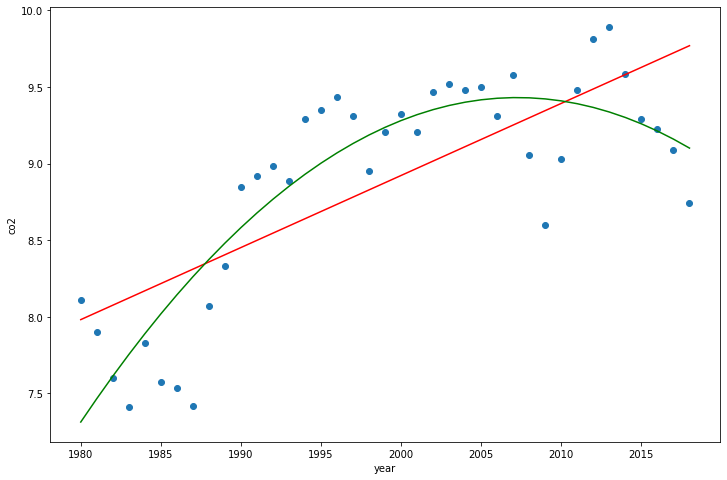

In [ ]:
b0_1, b1_1 = res1.params
b0_2, b1_2, b2_2 = res2.params

fig = plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(x, b0_1 + b1_1*x, 'r')
plt.plot(x, b0_2 + b1_2*x + b2_2*x**2, 'g')
plt.xlabel("year")
plt.ylabel("co2")
plt.show()

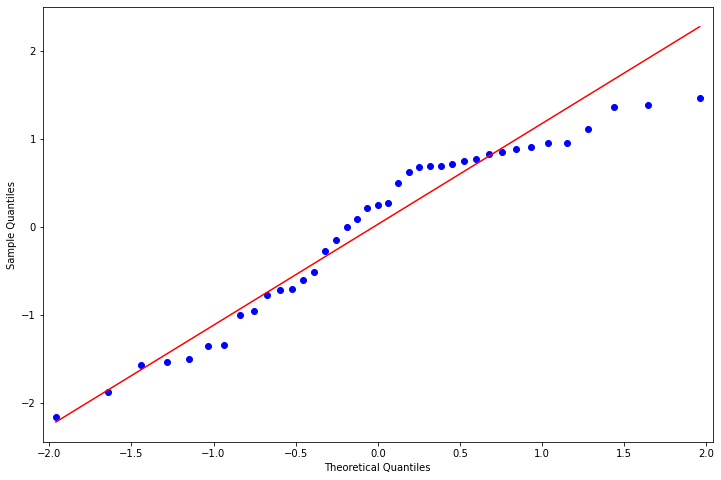

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(res1.resid, line="q", ax=ax, fit=True)

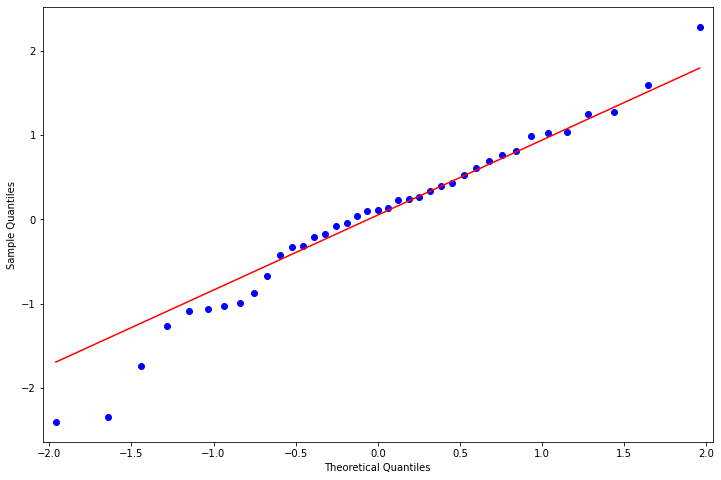

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(res2.resid, line="q", ax=ax, fit=True)